In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.spatial
from scipy.spatial.distance import euclidean
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import statistics
import sys

In [2]:
Data = pd.read_csv("BSOM_DataSet_for_HW2.csv")


#Get the specific columns from the dataset

In [84]:
specificData = Data.loc[:,['all_mcqs_avg_n20']]
specificData2 = Data.loc[:,['all_NBME_avg_n4']]
two_Variable_Data = Data.loc[:,['all_mcqs_avg_n20','all_NBME_avg_n4']]
target= Data.loc[:,['STEP_1']]





# Question 1a Linear Regression with One Variable 

In [85]:
X = specificData.values
XNBME = specificData2.values
y = target.values
X2 = two_Variable_Data.values

num_of_data, X_features = X.shape

train_X, test_X = X[:74,:], X[74:,:]
train_y, test_y = y[:74,:], y[74:,:]
train_X2, test_X2 =X2[:74,:],X2[74:,:]

train_N, train_X_Features = train_X.shape
train_N2, train_X2_Features = train_X2.shape

train_XNBME, test_XNBME = XNBME[:74,:], XNBME[74:,:]

In [5]:
train_y.shape


(74, 1)

In [44]:
iter=1000
learning_rate=0.2
np.random.seed()
theta = np.random.randint(500,size = (train_X_Features+1, 1))
print("initial theta:",theta)
ones = np.ones(len(train_X), dtype=np.int)
train_X1 = np.column_stack((ones,train_X))
prev_theta = 0
for i in range(1000):  
    hypothesis_Fn = train_X1.dot(theta)
    errors =  hypothesis_Fn - train_y 
    cur_costfn =  np.sum(errors**2)*(1/2*train_N)
    derivative =  (1/train_N) * (np.sum(np.dot(np.transpose(errors), train_X1)))
    prev_theta = theta
    theta = theta - (learning_rate * derivative)
    
    
    if(np.allclose(prev_theta,theta)):
        print("break theta:",theta)
        break
ones = np.ones(len(test_X), dtype=np.int)
test_X1 = np.column_stack((ones,test_X))
hyp_train=train_X1.dot(theta)
hyp_test =test_X1.dot(theta)


initial theta: [[ 62]
 [185]]
break theta: [[ 74.44645919]
 [197.44645919]]


Text(0.5,1,'Linear Regression with one variable')

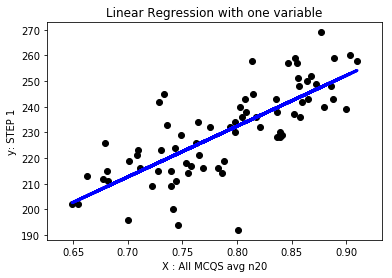

In [45]:
plt.scatter(train_X, train_y,  color='black')
plt.plot(train_X, hypothesis_Fn, color='blue', linewidth=3)
plt.xlabel('X : All MCQS avg n20')
plt.ylabel('y: STEP 1')
plt.title('Linear Regression with one variable for training data')
plt.show()

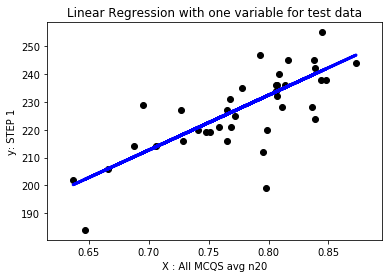

In [52]:
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, hyp_test, color='blue', linewidth=3)
plt.xlabel('X : All MCQS avg n20')
plt.ylabel('y: STEP 1')
plt.title('Linear Regression with one variable for test data')
plt.show()

# Question 1b Performance using metrics

In [8]:
def meansqer(X,Y):
    MSE = np.square(np.subtract(X,Y)).mean() 
    print("Mean Squared Error:",MSE)

In [9]:
def pearsoncorr(X, Y):
    covar = np.mean(Y*X)-(np.mean(Y)*np.mean(X))
    stddev_1 = np.sqrt(np.mean(Y**2)-(np.mean(Y))**2)
    stddev_2 = np.sqrt(np.mean(X**2)-np.mean(X)**2)
    corr_coeff = covar/(stddev_1*stddev_2)
    print("Pearson Correlation Coefficient:",corr_coeff)


In [54]:
def rsquare(Y, H):
    SStot = np.sum((Y - np.mean(Y))**2)
    SSres = np.sum((Y - H)**2)
    R2 =1 - (SSres /SStot)
    print("R square:",R2)

In [55]:
meansqer(test_y,hyp_test)
pearsoncorr(test_y,hyp_test)
rsquare(test_y,hyp_test)

Mean Squared Error: 96.3231631393655
Pearson Correlation Coefficient: 0.7430214418869375
R square: 0.5403618280578443


# Question 2a Linear Regression with multiple variable

In [82]:


iter=1000
learning_rate=0.2
np.random.seed()
theta = np.random.randint(500,size = (train_X2_Features+1, 1))
print("initial theta:",theta)
ones = np.ones(len(train_X2), dtype=np.int)
train_X22 = np.column_stack((ones,train_X2))
prev_theta = 0
for i in range(1000):  
    hypothesis_Fn2 = train_X22.dot(theta)
    errors =  hypothesis_Fn2 - train_y 
    #print("hypo:",hypothesis_Fn)
    #print("error:",errors)
    cur_costfn =  np.sum(errors**2)*(1/2*train_N)
     
    derivative =  (1/train_N2) * (np.sum(np.dot(np.transpose(errors), train_X22)))
    #print("derivative :", derivative)
    prev_theta = theta
    theta = theta - (learning_rate * derivative)
    #print(" theta :",theta,"cur cost:",cur_costfn,i)
    
    if(np.allclose(prev_theta,theta)):
        print("break theta:",theta,i)
        break
ones = np.ones(len(test_X2), dtype=np.int)
test_X22 = np.column_stack((ones,test_X2))
hyp_train2=train_X22.dot(theta)
hyp_test2 =test_X22.dot(theta)


initial theta: [[126]
 [314]
 [133]]
break theta: [[ 29.15611258]
 [217.15611258]
 [ 36.15611258]] 13


# Question 2b Metrics 

In [86]:
meansqer(test_y,hyp_test2)
pearsoncorr(test_y,hyp_test2)
rsquare(test_y,hyp_test2)

#correlation b/w MCQS and NBME
pearsoncorr(train_X,train_XNBME)

Mean Squared Error: 100.76222901975201
Pearson Correlation Coefficient: 0.7586371607024327
R square: 0.5191793413133056
Pearson Correlation Coefficient: 0.9019239453831074


In [87]:
train_X2


array([[0.736 , 0.77  ],
       [0.74  , 0.8   ],
       [0.807 , 0.8125],
       [0.886 , 0.925 ],
       [0.839 , 0.855 ],
       [0.758 , 0.775 ],
       [0.679 , 0.715 ],
       [0.749 , 0.7925],
       [0.682 , 0.74  ],
       [0.805 , 0.875 ],
       [0.837 , 0.8525],
       [0.729 , 0.81  ],
       [0.856 , 0.8875],
       [0.764 , 0.79  ],
       [0.858 , 0.88  ],
       [0.708 , 0.7775],
       [0.769 , 0.795 ],
       [0.837 , 0.84  ],
       [0.73  , 0.74  ],
       [0.798 , 0.8375],
       [0.794 , 0.8175],
       [0.841 , 0.81  ],
       [0.821 , 0.8475],
       [0.868 , 0.895 ],
       [0.815 , 0.8475],
       [0.9   , 0.9125],
       [0.865 , 0.86  ],
       [0.904 , 0.9275],
       [0.755 , 0.77  ],
       [0.663 , 0.74  ],
       [0.839 , 0.84  ],
       [0.744 , 0.745 ],
       [0.872 , 0.86  ],
       [0.889 , 0.92  ],
       [0.808 , 0.8375],
       [0.74  , 0.77  ],
       [0.803 , 0.86  ],
       [0.786 , 0.765 ],
       [0.709 , 0.83  ],
       [0.853 , 0.9225],


# Linear Regression with Synthetic data

In [15]:
sampleData = pd.read_excel("sampledataset.xlsx")
sampleDataX =  sampleData.loc[:,['all_mcqs_avg_n20']]
sampletarget = sampleData.loc[:,['STEP_1']]
sample_N, sample_Features = sampleDataX.shape
np.random.seed(233)
sampletheta = np.random.rand(sample_Features+1, 1)
ones = np.ones(len(sampleDataX), dtype=np.int)
sampleDataXX = np.column_stack((ones,sampleDataX))
iter=1000
learning_rate=0.01

prevsampletheta = 0
for i in range(1000):
    samplehypothesis_Fn = sampleDataXX.dot(sampletheta)
    
    sampleerrors =  samplehypothesis_Fn - sampletarget 
    
    cur_costfn =  np.sum(sampleerrors**2)*(1/2*sample_N)
    
    sderivative =  (1/sample_N) * (np.sum(np.dot(np.transpose(sampleerrors), sampleDataXX)))
    prevsampletheta = sampletheta
    sampletheta = sampletheta - (learning_rate * sderivative)
    if(np.array_equal(prevsampletheta,sampletheta)):
        print("hypo:",samplehypothesis_Fn)
        break

hypo: [[1.19102985]
 [2.15791801]
 [3.12480617]
 [4.09169433]
 [5.05858249]
 [6.02547065]
 [6.99235881]
 [7.95924696]
 [8.92613512]
 [9.89302328]]


Text(0.5,1,'Linear Regression with one variable')

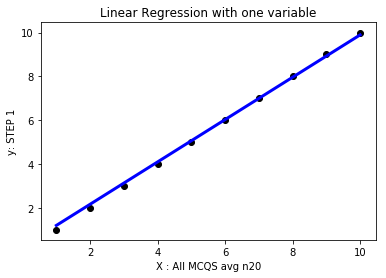

In [16]:
plt.scatter(sampleDataX, sampletarget,  color='black')
plt.plot(sampleDataX, samplehypothesis_Fn, color='blue', linewidth=3)
plt.xlabel('X : All MCQS avg n20')
plt.ylabel('y: STEP 1')
plt.title('Linear Regression with one variable')

Mean Squared Error: STEP_1    0.010811
dtype: float64


In [20]:
meansqer(sampletarget, samplehypothesis_Fn)
pearsoncorr(sampleDataX, samplehypothesis_Fn)
rsquare(sampletarget, samplehypothesis_Fn)

Mean Squared Error: STEP_1    0.010811
dtype: float64
Pearson Correlation Coefficient: all_mcqs_avg_n20    1.0
dtype: float64
R square: STEP_1    0.99869
dtype: float64


# Sklearn linear regression

X_train shape (74, 1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


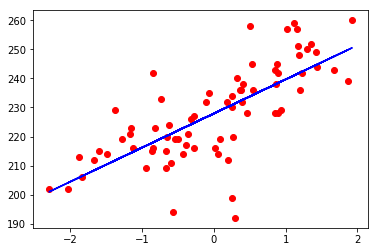

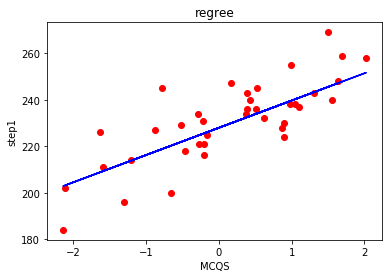

In [25]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('BSOM_DataSet_for_HW2.csv')
X = dataset.loc[:,['all_mcqs_avg_n20']].values
y = dataset.loc[:,['STEP_1']].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print("X_train shape",X_train.shape)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
train = sc_y.fit_transform(y_train)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('regree')
plt.xlabel('MCQS')
plt.ylabel('step1')
plt.show()

In [27]:
meansqer(regressor.predict(X_test),y_test)
pearsoncorr(regressor.predict(X_test),y_test)
rsquare(regressor.predict(X_test),y_test)

Mean Squared Error: 116.7963616750492
Pearson Correlation Coefficient: 0.7988830582069234
R square: 0.25656057136467103
